# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [260]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import string
import datetime 

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
data_folder="Output_Data/"
the_raw_data_file = "output_data/cities_raw.csv"
the_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [261]:
# List for holding lat_lngs and cities

how_many=1500

do_api=True

dbg=False                   # to control some printings

def create_lats_n_lngs():
    # Create a set of random lat and lng combinations
    if dbg: print("\n@ create_lats_n_lngs\n")
    lats = np.random.uniform(low=-90.000, high=90.000, size=how_many)
    lngs = np.random.uniform(low=-180.000, high=180.000, size=how_many)
    lat_lngs = zip(lats, lngs)
    if dbg: print(type(lats), len(lats))
    if dbg: print(type(lngs), len(lngs))
    return lat_lngs;

def find_cities(lt):
    # Identify nearest city for each lat, lng combination
    if dbg: print("\n@ find_cities\n")
    for lat_lng in lt:
        tmp_cll=[]
        city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
        if dbg: print(city)
        # If the city is unique, then add it to a our cities list
        if city not in cities:
            tmp_cll.append(city)
            tmp_cll.append(lat_lng[0])
            tmp_cll.append(lat_lng[1])
            if dbg: print(tmp_cll)
            cities.append(tmp_cll)          
    return;

if do_api:
    lat_lngs=[]
    cities=[]
    lnts=create_lats_n_lngs()
    if dbg: print(type(lnts))
    find_cities(lnts)
    # Print the city count to confirm sufficient count
    if dbg: print(type(cities),len(cities))

In [262]:
if dbg:
    if 'cities' in globals() or 'cities' in locals():
        for x in cities:
            print (x)

In [263]:
# base_url variable to store url 
# complete_url variable to store 
# complete url address 
#complete_url = base_url + "appid=" + api_key + "&q=" + city_name 
base_url = "http://api.openweathermap.org/data/2.5/weather?"

In [264]:
if dbg:
    if 'x' in globals() or 'x' in locals():
        for x in cities:
            print(x[0])

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [265]:
if do_api:
    all_responses=[]
    log_file=data_folder+"API_Calls_Log.CSV"
    logfile=open(log_file,"w")
    loghdg="API Call Date, API Call Time,  Running Count, City Name, Return Code"
    logfile.write(loghdg)
    xcount=0
    for x in cities:
        city_name=x[0]
        complete_url = base_url + "appid=" + api_key + "&q=" + city_name 
        time_stamp = str(datetime.datetime.now())
        response = requests.get(complete_url) 
        citydata = response.json() 
        return_code=citydata["cod"]
        xcount=xcount+1
        print(time_stamp, xcount, city_name, response, return_code)
        logline="\n"+time_stamp[0:10]+","+time_stamp[11:26]+","+str(xcount)+","+city_name+","+str(return_code)
        logfile.write(logline)
        if return_code==200:
            all_responses.append(citydata)
    logfile.close()

2019-09-04 12:59:03.858813 1 belushya guba <Response [404]> 404
2019-09-04 12:59:03.974274 2 ushuaia <Response [200]> 200
2019-09-04 12:59:04.114777 3 mataura <Response [200]> 200
2019-09-04 12:59:04.417682 4 cape town <Response [200]> 200
2019-09-04 12:59:04.557873 5 itarema <Response [200]> 200
2019-09-04 12:59:04.772210 6 faya <Response [200]> 200
2019-09-04 12:59:05.083178 7 deputatskiy <Response [200]> 200
2019-09-04 12:59:05.342681 8 ngukurr <Response [404]> 404
2019-09-04 12:59:05.471841 9 new norfolk <Response [200]> 200
2019-09-04 12:59:05.704897 10 rikitea <Response [200]> 200
2019-09-04 12:59:05.977215 11 atuona <Response [200]> 200
2019-09-04 12:59:06.259224 12 butaritari <Response [200]> 200
2019-09-04 12:59:06.499343 13 rikitea <Response [200]> 200
2019-09-04 12:59:06.779085 14 mataura <Response [200]> 200
2019-09-04 12:59:06.933073 15 hermanus <Response [200]> 200
2019-09-04 12:59:07.201177 16 atuona <Response [200]> 200
2019-09-04 12:59:07.310612 17 jamestown <Response 

2019-09-04 12:59:29.280548 138 mar del plata <Response [200]> 200
2019-09-04 12:59:29.492495 139 tuktoyaktuk <Response [200]> 200
2019-09-04 12:59:29.615193 140 barrow <Response [200]> 200
2019-09-04 12:59:29.913223 141 jamestown <Response [200]> 200
2019-09-04 12:59:30.038252 142 warqla <Response [404]> 404
2019-09-04 12:59:30.172804 143 jasper <Response [200]> 200
2019-09-04 12:59:30.431131 144 grindavik <Response [200]> 200
2019-09-04 12:59:30.656585 145 avarua <Response [200]> 200
2019-09-04 12:59:30.782890 146 nyborg <Response [200]> 200
2019-09-04 12:59:31.014078 147 warqla <Response [404]> 404
2019-09-04 12:59:31.139122 148 broken hill <Response [200]> 200
2019-09-04 12:59:31.365473 149 kapaa <Response [200]> 200
2019-09-04 12:59:31.490629 150 ribeira grande <Response [200]> 200
2019-09-04 12:59:31.608387 151 kaseda <Response [200]> 200
2019-09-04 12:59:31.870502 152 hombourg-haut <Response [200]> 200
2019-09-04 12:59:32.090783 153 khatanga <Response [200]> 200
2019-09-04 12:59:

2019-09-04 12:59:52.858415 273 khomeynishahr <Response [404]> 404
2019-09-04 12:59:52.985305 274 lingao <Response [200]> 200
2019-09-04 12:59:53.219891 275 chuy <Response [200]> 200
2019-09-04 12:59:53.330214 276 punta arenas <Response [200]> 200
2019-09-04 12:59:53.461333 277 cherrapunji <Response [200]> 200
2019-09-04 12:59:53.677640 278 hihifo <Response [404]> 404
2019-09-04 12:59:53.798274 279 kaitangata <Response [200]> 200
2019-09-04 12:59:53.934460 280 isangel <Response [200]> 200
2019-09-04 12:59:54.194851 281 san patricio <Response [200]> 200
2019-09-04 12:59:54.413400 282 cape town <Response [200]> 200
2019-09-04 12:59:54.530055 283 mys shmidta <Response [404]> 404
2019-09-04 12:59:54.667824 284 georgetown <Response [200]> 200
2019-09-04 12:59:54.777613 285 gloucester <Response [200]> 200
2019-09-04 12:59:55.090814 286 cape town <Response [200]> 200
2019-09-04 12:59:55.200555 287 soyo <Response [200]> 200
2019-09-04 12:59:55.459031 288 arraial do cabo <Response [200]> 200
201

2019-09-04 13:00:30.361459 408 dire <Response [200]> 200
2019-09-04 13:00:30.984485 409 cape town <Response [200]> 200
2019-09-04 13:00:31.109711 410 mandalgovi <Response [200]> 200
2019-09-04 13:00:31.329251 411 kahului <Response [200]> 200
2019-09-04 13:00:31.454346 412 coos bay <Response [200]> 200
2019-09-04 13:00:31.681205 413 kapaa <Response [200]> 200
2019-09-04 13:00:31.806181 414 lata <Response [200]> 200
2019-09-04 13:00:32.049476 415 hermanus <Response [200]> 200
2019-09-04 13:00:32.182315 416 avarua <Response [200]> 200
2019-09-04 13:00:32.306954 417 san cristobal <Response [200]> 200
2019-09-04 13:00:32.505486 418 daru <Response [200]> 200
2019-09-04 13:00:32.835356 419 nuuk <Response [200]> 200
2019-09-04 13:00:33.022791 420 punta arenas <Response [200]> 200
2019-09-04 13:00:33.147358 421 scarborough <Response [200]> 200
2019-09-04 13:00:33.298850 422 ushuaia <Response [200]> 200
2019-09-04 13:00:33.423672 423 jalu <Response [200]> 200
2019-09-04 13:00:33.660480 424 taola

2019-09-04 13:00:53.181425 542 port lincoln <Response [200]> 200
2019-09-04 13:00:53.414899 543 tuktoyaktuk <Response [200]> 200
2019-09-04 13:00:53.536866 544 mao <Response [200]> 200
2019-09-04 13:00:53.833843 545 belushya guba <Response [404]> 404
2019-09-04 13:00:53.965365 546 hobart <Response [200]> 200
2019-09-04 13:00:54.085362 547 butaritari <Response [200]> 200
2019-09-04 13:00:54.234617 548 baruun-urt <Response [200]> 200
2019-09-04 13:00:54.462419 549 ponta do sol <Response [200]> 200
2019-09-04 13:00:54.581488 550 victoria <Response [200]> 200
2019-09-04 13:00:54.711519 551 linares <Response [200]> 200
2019-09-04 13:00:54.935574 552 mataura <Response [200]> 200
2019-09-04 13:00:55.048512 553 harper <Response [200]> 200
2019-09-04 13:00:55.177362 554 saskylakh <Response [200]> 200
2019-09-04 13:00:55.291873 555 karpogory <Response [200]> 200
2019-09-04 13:00:55.512815 556 dikson <Response [200]> 200
2019-09-04 13:00:55.628669 557 kapaa <Response [200]> 200
2019-09-04 13:00:5

2019-09-04 13:01:13.927464 675 arraial do cabo <Response [200]> 200
2019-09-04 13:01:14.096216 676 jeremie <Response [200]> 200
2019-09-04 13:01:14.365301 677 chokurdakh <Response [200]> 200
2019-09-04 13:01:14.602024 678 saint-philippe <Response [200]> 200
2019-09-04 13:01:14.725532 679 rikitea <Response [200]> 200
2019-09-04 13:01:14.855038 680 manakara <Response [200]> 200
2019-09-04 13:01:15.078842 681 rikitea <Response [200]> 200
2019-09-04 13:01:15.192895 682 chuy <Response [200]> 200
2019-09-04 13:01:15.324264 683 tamiahua <Response [200]> 200
2019-09-04 13:01:15.552447 684 hami <Response [200]> 200
2019-09-04 13:01:15.784162 685 uribia <Response [200]> 200
2019-09-04 13:01:16.014468 686 santiago del estero <Response [200]> 200
2019-09-04 13:01:16.254419 687 puerto ayora <Response [200]> 200
2019-09-04 13:01:16.375002 688 galle <Response [200]> 200
2019-09-04 13:01:16.605360 689 rikitea <Response [200]> 200
2019-09-04 13:01:16.726755 690 kapaa <Response [200]> 200
2019-09-04 13:

2019-09-04 13:01:36.586826 811 mahebourg <Response [200]> 200
2019-09-04 13:01:36.709822 812 ushuaia <Response [200]> 200
2019-09-04 13:01:36.820208 813 taltal <Response [200]> 200
2019-09-04 13:01:37.055938 814 jamestown <Response [200]> 200
2019-09-04 13:01:37.180974 815 pitkyaranta <Response [200]> 200
2019-09-04 13:01:37.390316 816 flinders <Response [200]> 200
2019-09-04 13:01:37.660008 817 port elizabeth <Response [200]> 200
2019-09-04 13:01:37.785111 818 punta arenas <Response [200]> 200
2019-09-04 13:01:37.908749 819 mataura <Response [200]> 200
2019-09-04 13:01:38.021763 820 yellowknife <Response [200]> 200
2019-09-04 13:01:38.152124 821 cape town <Response [200]> 200
2019-09-04 13:01:38.269799 822 lebu <Response [200]> 200
2019-09-04 13:01:38.393474 823 busselton <Response [200]> 200
2019-09-04 13:01:38.503286 824 ushuaia <Response [200]> 200
2019-09-04 13:01:38.628768 825 arraial do cabo <Response [200]> 200
2019-09-04 13:01:38.738234 826 pinawa <Response [200]> 200
2019-09-

2019-09-04 13:01:56.767734 945 paradwip <Response [404]> 404
2019-09-04 13:01:56.983407 946 port alfred <Response [200]> 200
2019-09-04 13:01:57.091355 947 ushuaia <Response [200]> 200
2019-09-04 13:01:57.212477 948 puerto ayora <Response [200]> 200
2019-09-04 13:01:57.323690 949 ushuaia <Response [200]> 200
2019-09-04 13:01:57.449217 950 honningsvag <Response [200]> 200
2019-09-04 13:01:57.572569 951 mana <Response [200]> 200
2019-09-04 13:01:57.788275 952 babanusah <Response [404]> 404
2019-09-04 13:01:57.928854 953 nome <Response [200]> 200
2019-09-04 13:01:58.043838 954 kapaa <Response [200]> 200
2019-09-04 13:01:58.160276 955 rikitea <Response [200]> 200
2019-09-04 13:01:58.286562 956 hasaki <Response [200]> 200
2019-09-04 13:01:58.408662 957 ushuaia <Response [200]> 200
2019-09-04 13:01:58.525462 958 hobart <Response [200]> 200
2019-09-04 13:01:58.637203 959 bredasdorp <Response [200]> 200
2019-09-04 13:01:58.761928 960 punta arenas <Response [200]> 200
2019-09-04 13:01:58.932191

2019-09-04 13:02:17.004005 1078 saint-paul <Response [200]> 200
2019-09-04 13:02:17.237146 1079 hermanus <Response [200]> 200
2019-09-04 13:02:17.362110 1080 rikitea <Response [200]> 200
2019-09-04 13:02:17.488495 1081 coruripe <Response [200]> 200
2019-09-04 13:02:17.722789 1082 jamestown <Response [200]> 200
2019-09-04 13:02:17.838169 1083 attawapiskat <Response [404]> 404
2019-09-04 13:02:17.973971 1084 hualmay <Response [200]> 200
2019-09-04 13:02:18.203379 1085 lebu <Response [200]> 200
2019-09-04 13:02:18.320638 1086 illoqqortoormiut <Response [404]> 404
2019-09-04 13:02:18.444993 1087 keti bandar <Response [200]> 200
2019-09-04 13:02:18.666446 1088 riobamba <Response [200]> 200
2019-09-04 13:02:19.004406 1089 faya <Response [200]> 200
2019-09-04 13:02:19.129547 1090 hilo <Response [200]> 200
2019-09-04 13:02:19.265896 1091 upernavik <Response [200]> 200
2019-09-04 13:02:19.384801 1092 soligalich <Response [200]> 200
2019-09-04 13:02:19.619125 1093 bathsheba <Response [200]> 200


2019-09-04 13:02:37.186507 1210 buchanan <Response [200]> 200
2019-09-04 13:02:37.435639 1211 fare <Response [200]> 200
2019-09-04 13:02:37.669869 1212 matagami <Response [200]> 200
2019-09-04 13:02:37.899927 1213 vanavara <Response [200]> 200
2019-09-04 13:02:38.163031 1214 asau <Response [404]> 404
2019-09-04 13:02:38.284265 1215 rikitea <Response [200]> 200
2019-09-04 13:02:38.404562 1216 busselton <Response [200]> 200
2019-09-04 13:02:38.519989 1217 ushuaia <Response [200]> 200
2019-09-04 13:02:38.645570 1218 rikitea <Response [200]> 200
2019-09-04 13:02:38.769909 1219 san patricio <Response [200]> 200
2019-09-04 13:02:38.890825 1220 tasiilaq <Response [200]> 200
2019-09-04 13:02:39.016142 1221 ushuaia <Response [200]> 200
2019-09-04 13:02:39.140924 1222 bonthe <Response [200]> 200
2019-09-04 13:02:39.455573 1223 sabratah <Response [200]> 200
2019-09-04 13:02:39.707421 1224 ushuaia <Response [200]> 200
2019-09-04 13:02:39.832778 1225 cape town <Response [200]> 200
2019-09-04 13:02:

2019-09-04 13:02:57.919245 1343 mataura <Response [200]> 200
2019-09-04 13:02:58.048954 1344 barrow <Response [200]> 200
2019-09-04 13:02:58.169777 1345 batagay-alyta <Response [200]> 200
2019-09-04 13:02:58.385535 1346 palabuhanratu <Response [404]> 404
2019-09-04 13:02:58.510618 1347 tumannyy <Response [404]> 404
2019-09-04 13:02:58.643754 1348 puerto ayacucho <Response [200]> 200
2019-09-04 13:02:58.895040 1349 ixtapa <Response [200]> 200
2019-09-04 13:02:59.188676 1350 hobart <Response [200]> 200
2019-09-04 13:02:59.313632 1351 orocue <Response [200]> 200
2019-09-04 13:02:59.549905 1352 lorengau <Response [200]> 200
2019-09-04 13:02:59.690143 1353 namatanai <Response [200]> 200
2019-09-04 13:02:59.822446 1354 alihe <Response [200]> 200
2019-09-04 13:03:00.035695 1355 valley city <Response [200]> 200
2019-09-04 13:03:00.256030 1356 busselton <Response [200]> 200
2019-09-04 13:03:00.384877 1357 olga <Response [200]> 200
2019-09-04 13:03:00.757157 1358 mont-dore <Response [200]> 200
2

2019-09-04 13:03:18.353875 1474 chokurdakh <Response [200]> 200
2019-09-04 13:03:18.486504 1475 flinders <Response [200]> 200
2019-09-04 13:03:18.599925 1476 albany <Response [200]> 200
2019-09-04 13:03:18.719532 1477 chokurdakh <Response [200]> 200
2019-09-04 13:03:18.839416 1478 paamiut <Response [200]> 200
2019-09-04 13:03:19.103908 1479 avarua <Response [200]> 200
2019-09-04 13:03:19.224955 1480 aklavik <Response [200]> 200
2019-09-04 13:03:19.344504 1481 cabedelo <Response [200]> 200
2019-09-04 13:03:19.465121 1482 labuhan <Response [200]> 200
2019-09-04 13:03:19.701511 1483 valparaiso <Response [200]> 200
2019-09-04 13:03:19.941824 1484 cape town <Response [200]> 200
2019-09-04 13:03:20.064830 1485 korla <Response [404]> 404
2019-09-04 13:03:20.193678 1486 waingapu <Response [200]> 200
2019-09-04 13:03:20.409222 1487 iqaluit <Response [200]> 200
2019-09-04 13:03:20.695276 1488 rikitea <Response [200]> 200
2019-09-04 13:03:20.817456 1489 zalakomar <Response [200]> 200
2019-09-04 1

In [266]:
if dbg:
    print(type(all_responses), len(all_responses))
    print(all_responses)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [267]:
if do_api:
    if dbg:
        for x in all_responses:
            print(type(x), len(x))
            print(x,"\n")
    df=pd.DataFrame(all_responses)
    df.to_csv(the_raw_data_file)
    print(type(df), len(df))
    df.head()

<class 'pandas.core.frame.DataFrame'> 1362


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [268]:
if do_api:
    cols=["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max_Temp","Wind_Speed"]
    plotdf=pd.DataFrame(columns=cols)
    print(plotdf.head())

Empty DataFrame
Columns: [City, Cloudiness, Country, Date, Humidity, Lat, Lng, Max_Temp, Wind_Speed]
Index: []


In [269]:
#DataFrame.append(other, ignore_index=False, verify_integrity=False, sort=None)
# Conversion: (296K − 273.15) × 9/5 + 32 = 73.13°F
if do_api:
    for xi in range(len(df)):
        arow=[]
        arow.append(df.iloc[xi]["name"])
        arow.append(df.iloc[xi]["clouds"]["all"])
        arow.append(df.iloc[xi]["sys"]["country"])
        xdt=datetime.datetime.fromtimestamp(df.iloc[xi]["dt"]).isoformat()
        xxdt=xdt[5:7]+"/"+xdt[8:10]+"/"+xdt[2:4]
        arow.append(xxdt)
        arow.append(df.iloc[xi]["main"]["humidity"])
        arow.append(df.iloc[xi]["coord"]["lat"])
        arow.append(df.iloc[xi]["coord"]["lon"])
        xtemp=df.iloc[xi]["main"]["temp_max"]
        ftemp=(xtemp-273.15)*(9/5)+32
        arow.append(ftemp)
        arow.append(df.iloc[xi]["wind"]["speed"])
        plotdf.loc[xi]=arow
    
    print(plotdf.head())
    plotdf.to_csv(the_data_file)
else:
    plotdf=pd.read_csv(the_data_file, sep=",")
    print(type(plotdf), len(plotdf))

        City Cloudiness Country      Date Humidity    Lat     Lng  Max_Temp  \
0    Ushuaia          0      AR  09/04/19       60 -54.81  -68.31    41.000   
1    Mataura        100      NZ  09/04/19       96 -46.19  168.86    46.004   
2  Cape Town         20      ZA  09/04/19       77 -33.93   18.42    60.008   
3    Itarema         74      BR  09/04/19       52  -2.92  -39.92    86.990   
4       Faya         40      SA  09/04/19       47  18.39   42.45    78.800   

   Wind_Speed  
0       10.80  
1        1.73  
2       10.30  
3        7.54  
4        2.10  


In [270]:
plotdf.head(20)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,Ushuaia,0,AR,09/04/19,60,-54.81,-68.31,41.000,10.80
1,Mataura,100,NZ,09/04/19,96,-46.19,168.86,46.004,1.73
2,Cape Town,20,ZA,09/04/19,77,-33.93,18.42,60.008,10.30
3,Itarema,74,BR,09/04/19,52,-2.92,-39.92,86.990,7.54
4,Faya,40,SA,09/04/19,47,18.39,42.45,78.800,2.10
5,Deputatskiy,100,RU,09/04/19,83,69.30,139.90,36.950,0.68
6,New Norfolk,29,AU,09/04/19,97,-42.78,147.06,46.004,2.60
7,Rikitea,95,PF,09/04/19,71,-23.12,-134.97,72.950,3.31
8,Atuona,74,PF,09/04/19,74,-9.80,-139.03,78.530,3.92
9,Butaritari,95,KI,09/04/19,74,3.07,172.79,83.210,2.43


In [271]:
maxlat=plotdf["Lat"].max()+1
minlat=plotdf["Lat"].min()-1
maxx=(int(maxlat/5))*5+5
minx=(int(minlat/5))*5-5
print(maxx, minx)

80 -60


#### Latitude vs. Temperature Plot

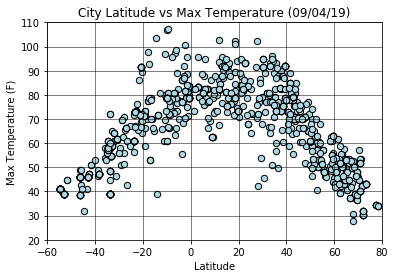

In [272]:
sfactor=40

thiscol="Max_Temp"

maxtemp=plotdf[thiscol].max()+1
mintemp=plotdf[thiscol].min()-1
maxy=(int(maxtemp/5))*5+5
miny=(int(mintemp/5))*5-5

ylimit=(miny, maxy)
xlimit=(minx, maxx)

thisdate=plotdf.iloc[0]["Date"]
fig, ax = plt.subplots()

plotdf.plot(kind='scatter', x=["Lat"], y=[thiscol], s=sfactor, color="lightblue", edgecolor="k",
                              xlim=(xlimit), ylim=(ylimit), ax=ax)

plt.title('City Latitude vs Max Temperature ('+thisdate+")") 
plt.xlabel('Latitude') 
plt.ylabel('Max Temperature (F)') 
plt.grid(color='k', linestyle='-', linewidth=0.5)

plt.savefig(data_folder+thiscol+'_vs_Latitude.png')

#### Latitude vs. Humidity Plot

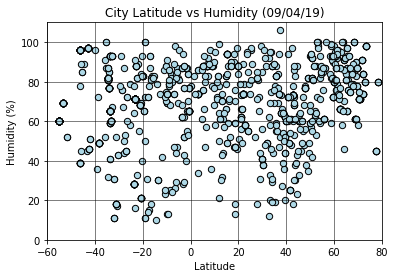

In [273]:
thiscol="Humidity"

maxhumd=plotdf[thiscol].max()+1
minhumd=plotdf[thiscol].min()-1
maxy=(int(maxhumd/5))*5+5
miny=(int(minhumd/5))*5-5

ylimit=(miny, maxy)
xlimit=(minx, maxx)

thisdate=plotdf.iloc[0]["Date"]
fig, ax = plt.subplots()

plotdf.plot(kind='scatter', x=["Lat"], y=[thiscol], s=sfactor, color="lightblue", edgecolor="k",
                              xlim=(xlimit), ylim=(ylimit), ax=ax)

plt.title('City Latitude vs Humidity ('+thisdate+")") 
plt.xlabel('Latitude') 
plt.ylabel('Humidity (%)') 
plt.grid(color='k', linestyle='-', linewidth=0.5)

plt.savefig(data_folder+thiscol+'_vs_Latitude.png')

#### Latitude vs. Cloudiness Plot

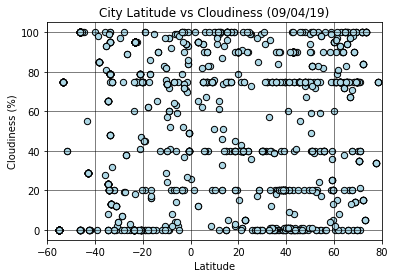

In [274]:
thiscol="Cloudiness"

maxcloud=plotdf[thiscol].max()+1
mincloud=plotdf[thiscol].min()-1
maxy=(int(maxcloud/5))*5+5
miny=(int(mincloud/5))*5-5

ylimit=(miny, maxy)
xlimit=(minx, maxx)

thisdate=plotdf.iloc[0]["Date"]
fig, ax = plt.subplots()

plotdf.plot(kind='scatter', x=["Lat"], y=[thiscol], s=sfactor, color="lightblue", edgecolor="k",
                              xlim=(xlimit), ylim=(ylimit), ax=ax)

plt.title('City Latitude vs Cloudiness ('+thisdate+")") 
plt.xlabel('Latitude') 
plt.ylabel('Cloudiness (%)') 
plt.grid(color='k', linestyle='-', linewidth=0.5)

plt.savefig(data_folder+thiscol+'_vs_Latitude.png')

#### Latitude vs. Wind Speed Plot

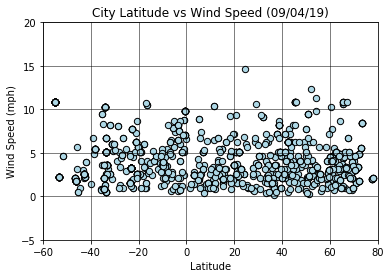

In [275]:
thiscol="Wind_Speed"

maxcloud=plotdf[thiscol].max()+1
mincloud=plotdf[thiscol].min()-1
maxy=(int(maxcloud/5))*5+5
miny=(int(mincloud/5))*5-5

ylimit=(miny, maxy)
xlimit=(minx, maxx)

thisdate=plotdf.iloc[0]["Date"]
fig, ax = plt.subplots()

plotdf.plot(kind='scatter', x=["Lat"], y=[thiscol], s=sfactor, color="lightblue", edgecolor="k",
                              xlim=(xlimit), ylim=(ylimit), ax=ax)

plt.title('City Latitude vs Wind Speed ('+thisdate+")") 
plt.xlabel('Latitude') 
plt.ylabel('Wind Speed (mph)') 
plt.grid(color='k', linestyle='-', linewidth=0.5)

plt.savefig(data_folder+thiscol+'_vs_Latitude.png')

In [276]:
print("\n\nAll Done .................\n\n")



All Done .................


